## Figure 5:  Trial-by-trial brain-skin conductance correlation and controllability in the BST
last updated: 09/24/2020 <br>
created by: Kelly Morrow (kmorrow@umd.edu)

### Libraries

In [3]:
library(data.table)
library(ggplot2)
library(ggridges)
library(dplyr)
library(ggthemes)
library(gridExtra)
library(cowplot)

options(warn=-1)

iterations <- 20000

### Skin conductance and Controllability correlation posteriors
Contains intercept plus covariates (STAI data)

In [22]:
# left BST 
lBST <- read.table('uncon_v_con_lBST_SCR_corr.txt', header = TRUE, sep = ',')
lBST$X <- NULL
lBST$ROI <- rep("lBST", length = iterations)

# right BST
rBST <- read.table('uncon_v_con_rBST_SCR_corr.txt', header = TRUE, sep = ',')
rBST$X <- NULL
rBST$ROI <- rep("rBST", length = iterations)

BST.df <- rbind(lBST, rBST)


Intercept.df <- BST.df %>%
          mutate(index = rep(1:2, each = iterations)) %>%
          group_by(ROI) %>%
          select("ROI", "index", "Intercept") %>% 
          mutate(measure = rep("Controllability", length(iterations))) %>%        # rename intercept to "Controllability"
          mutate(p = rep((sum(Intercept > 0)/iterations)))                        # calculate P+ values

# create summary dataframe for plotting
summary.df <- Intercept.df %>% 
          select("ROI","p","index") %>%
          unique()

ROI,p,index
<chr>,<dbl>,<int>
lBST,0.90525,1
rBST,0.96310,2


Picking joint bandwidth of 0.00848



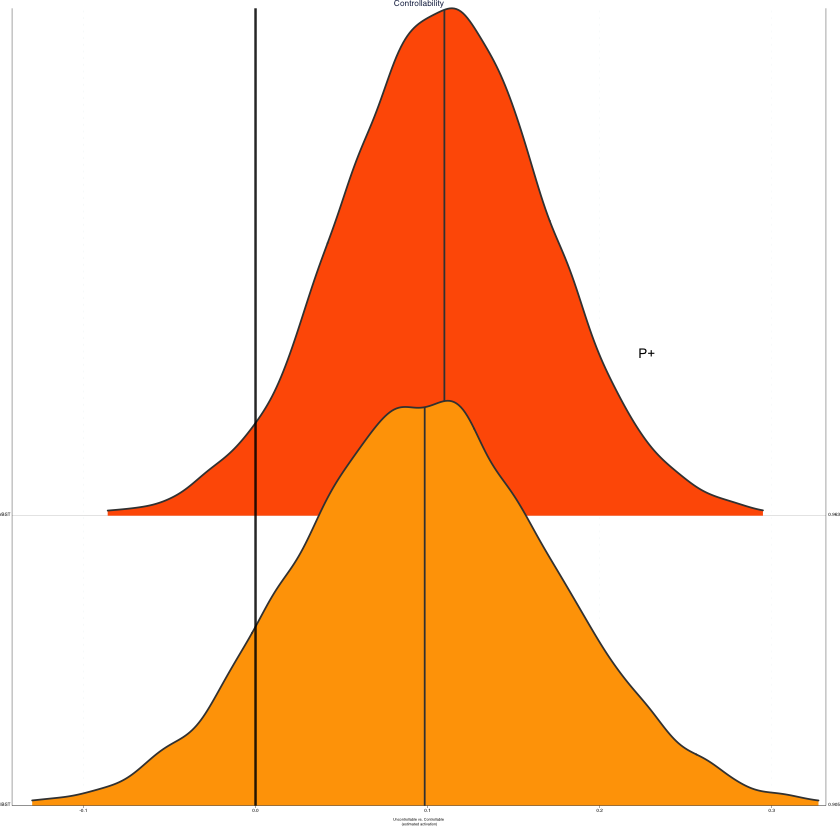

In [29]:
BST.controllability <- ggplot(Intercept.df, aes(x = Intercept, y = as.numeric(index), group = ROI, fill = p)) +

coord_cartesian(xlim = c(-0.12, 0.31), clip = 'off') +

geom_density_ridges(quantile_lines = TRUE,
                    quantiles = 2,
                    scale = 1.75,
                    rel_min_height = .01,
                    color = "#404040",
                    size = .5) +

geom_vline(xintercept = 0, alpha = .85, color = "black", size = .70) +

scale_y_continuous(breaks = 1:length(summary.df$index),
                   expand = c(0,0),
                   labels = summary.df$ROI,
                   sec.axis = sec_axis(~.,
                                       breaks = 1:length(summary.df$index),
                                       labels = format(round(summary.df$p, 3),nsmall = 2))) +

scale_fill_gradientn(limits = c(0,1),
                     colors = c("blue","cyan","gray","yellow","red"),
                     values = c(0,0.15,0.150000001, 0.85,0.850000001, 1.0), 
                     breaks = c(0, 0.15, 0.85, 1)) +

guides(fill = guide_colorbar(barwidth = .75,
                             barheight = 5,
                             nbin = 50,
                             frame.colour = "black",
                             frame.linewidth = .5,
                             ticks.colour = "black")) +

theme_stata() +

theme(
    plot.background = element_blank(),
    plot.margin = unit(c(0,0,0.3,0),"cm"),
    panel.background = element_blank(),
    panel.grid.major.y = element_line(color = "grey",
                                      size = .1),
    panel.grid.major.x = element_line(linetype = "dotted",
                                      size = .1),
    plot.title = element_text(size = 5,
                              margin = unit(c(0,0.1,0.01,02),"cm"),
                              face = "plain",
                              hjust = 0.5), 
    axis.line = element_line(size = .1),
    legend.title = element_text(size = 3),
    legend.text = element_text(size = 3,
                               angle = 0),
    legend.position = 'none',
    legend.background = element_blank(),
    legend.box.background = element_rect(colour = "black",
                                         size = .75),
    axis.title = element_text(size = 2.25),
    axis.text.x = element_text(size = 2.8,
                               margin = unit(c(0.01,0,0,0), "cm")),
    axis.text.y = element_text(size= 2.8,
                               color = "black",
                               margin = unit(c(0,-.02,0,0),"cm"),
                               angle = 0,
                               vjust = 0), 
    axis.text.y.right = element_text(size = 2.8,
                                     color = "black",
                                     margin = unit(c(0,0,-.5,0),"cm"),
                                     angle = 0),      
    axis.ticks.x = element_line(size = .1),
    axis.ticks.y = element_blank(),
    axis.ticks.length = unit(.05, "cm")) +

  labs(
    x = "Uncontrollable vs. Controllable \n (estimated activation)",                                                       
    y = NULL,
    title = "Controllability", 
    fill = "P+") 
  
plot <- ggdraw(BST.controllability) + 
  draw_text("P+", x = .77, y = .58, size= 8)

ggsave('Fig3.BST_controllability_posteriors.png', plot = plot, dpi = 1200, heigh = 1, width = 2)


plot
